In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# Load the dataset
data = pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# Displaying the no of rows and columns
print(data.shape)

# Print datatypes of each column
print(data.dtypes)

#checking for missing values
print(data.isnull().sum())

(159, 7)
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


<ipython-input-4-6c34c0155af0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data['Species'],palette='Set1')


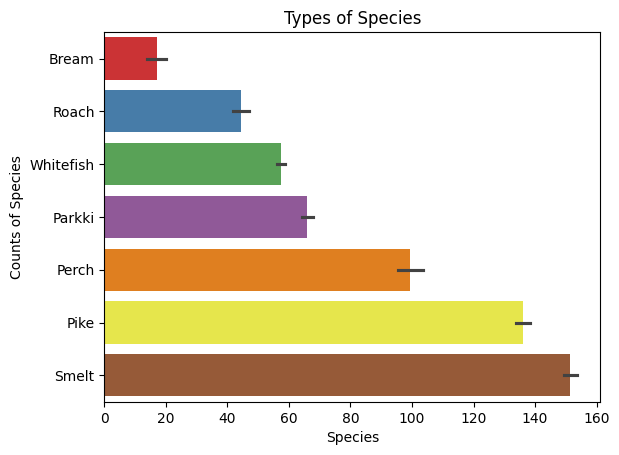

In [4]:
#Count no of unique species
data['Species'].value_counts()

#plotting it
sns.barplot(x=data.index, y=data['Species'],palette='Set1')
plt.title("Types of Species")
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [5]:
# Encoding categorical columns
for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

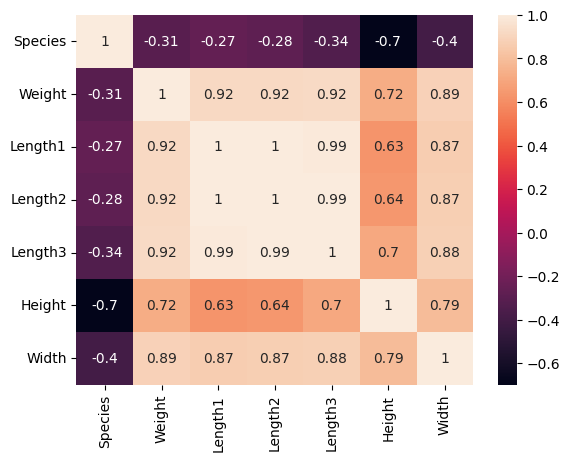

In [6]:
# Correlation of the Variables:
data.corr()
sns.heatmap(data.corr(), annot=True);

,Weight
142,1600.0
143,1550.0
144,1650.0


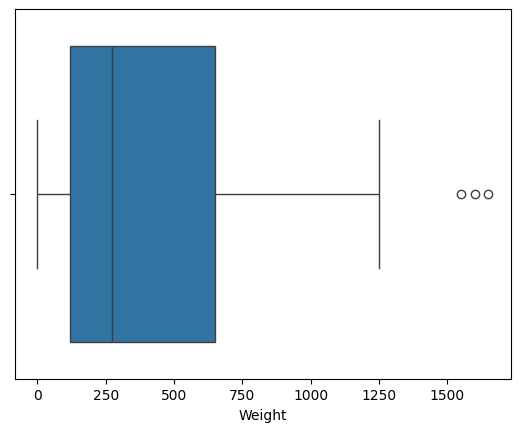

In [7]:
sns.boxplot(x=data['Weight'])

dfw = data['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

In [8]:
#defining input and target variables
X= data.loc[:, data.columns != 'Weight']
y= data['Weight']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [9]:
# Fitting the Multiple Linear Regression in the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set results
Y_Pred = regressor.predict(X_Test)

In [10]:
# Evaluation
print("R² Score:", r2_score(Y_Test, Y_Pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_Test, Y_Pred)))

R² Score: 0.8734952284180402
RMSE: 155.17817227812904


# Implementing backward Selection

In [11]:
# Add constant column for statsmodels
X = sm.add_constant(X)

In [12]:
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while True:
        X_ols = sm.OLS(y, X[features]).fit()
        p_values = X_ols.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            print(f"Dropping '{excluded_feature}' with p-value {max_p_value:.4f}")
            features.remove(excluded_feature)
        else:
            break
    return X[features], X_ols

In [13]:
X_optimal, model_summary = backward_elimination(X, y)
print(model_summary.summary())

Dropping 'Width' with p-value 0.7220
Dropping 'Length1' with p-value 0.4744
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     325.1
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           5.66e-74
Time:                        10:51:27   Log-Likelihood:                -981.59
No. Observations:                 159   AIC:                             1973.
Df Residuals:                     154   BIC:                             1989.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [14]:
X_optimal

,const,Species,Length2,Length3,Height
0,1.0,0,25.4,30.0,11.5200
1,1.0,0,26.3,31.2,12.4800
2,1.0,0,26.5,31.1,12.3778
3,1.0,0,29.0,33.5,12.7300
4,1.0,0,29.0,34.0,12.4440
...,...,...,...,...,...
154,1.0,5,12.2,13.4,2.0904
155,1.0,5,12.4,13.5,2.4300
156,1.0,5,13.0,13.8,2.2770
157,1.0,5,14.3,15.2,2.8728


In [15]:
# Train-test split using optimal features
X_train, X_test, y_train, y_test = train_test_split(X_optimal, y, test_size=0.2, random_state=0)

In [16]:
# Fit and predict with optimal features
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [17]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8748358349768541
RMSE: 154.35374898393303


# Implementing Forward Selection

In [18]:
def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []

    while remaining_features:
        pvals = {}
        for feature in remaining_features:
            try_features = initial_features + [feature]
            model = sm.OLS(y, X[try_features]).fit()
            pvals[feature] = model.pvalues[feature]

        min_p_value = min(pvals.values())
        best_feature = min(pvals, key=pvals.get)

        if min_p_value < significance_level:
            print(f"Adding '{best_feature}' with p-value {min_p_value:.4f}")
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features = initial_features.copy()
        else:
            break

    final_model = sm.OLS(y, X[best_features]).fit()
    return X[best_features], final_model


In [19]:
X_forward, forward_model = forward_selection(X, y)
print(forward_model.summary())

Adding 'Length1' with p-value 0.0000
Adding 'const' with p-value 0.0000
Adding 'Height' with p-value 0.0000
Adding 'Species' with p-value 0.0008
Adding 'Length3' with p-value 0.0006
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     323.4
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           8.20e-74
Time:                        11:13:06   Log-Likelihood:                -981.97
No. Observations:                 159   AIC:                             1974.
Df Residuals:                     154   BIC:                             1989.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std

In [20]:
# Train-test split using optimal features
X_train, X_test, y_train, y_test = train_test_split(X_forward, y, test_size=0.2, random_state=0)

In [21]:
# Fit and predict with optimal features
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [22]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8717117970079958
RMSE: 156.26817486237906


# Stepwise selection

In [23]:
def stepwise_selection(X, y, entry_threshold=0.05, exit_threshold=0.05):
    included = []
    while True:
        changed = False

        # Forward Step
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            new_pvals[new_column] = model.pvalues[new_column]

        if not new_pvals.empty:
            best_pval = new_pvals.min()
            if best_pval < entry_threshold:
                best_feature = new_pvals.idxmin()
                included.append(best_feature)
                changed = True
                print(f"Add  '{best_feature}' with p-value {best_pval:.4f}")

        # Backward Step
        if included:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues = model.pvalues.iloc[1:]  # skip intercept
            worst_pval = pvalues.max()
            if worst_pval > exit_threshold:
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                changed = True
                print(f"Drop '{worst_feature}' with p-value {worst_pval:.4f}")

        if not changed:
            break

    model = sm.OLS(y, sm.add_constant(X[included])).fit()
    return X[included], model


In [24]:
X_stepwise, stepwise_model = stepwise_selection(X.drop(columns=['const']), y)
print(stepwise_model.summary())

Add  'Length3' with p-value 0.0000
Add  'Width' with p-value 0.0000
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     556.4
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           9.97e-72
Time:                        11:21:29   Log-Likelihood:                -993.47
No. Observations:                 159   AIC:                             1993.
Df Residuals:                     156   BIC:                             2002.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [25]:
# Train-test split using optimal features
X_train, X_test, y_train, y_test = train_test_split(X_stepwise, y, test_size=0.2, random_state=0)

In [26]:
# Fit and predict with optimal features
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [27]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8706799060410972
RMSE: 156.89539058960813
